In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [ ]:

data = pd.read_csv('heart.csv')

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data['Sex'] = pd.Categorical(data.Sex).codes
data['Sex'].unique()


array([1, 0], dtype=int8)

In [ ]:
data['ST_Slope'] = pd.Categorical(data.ST_Slope).codes
data['ST_Slope'].unique()


array([2, 1, 0], dtype=int8)

In [ ]:
data['ExerciseAngina'] = pd.Categorical(data.ExerciseAngina).codes
data['ExerciseAngina'].unique()


array([0, 1], dtype=int8)

In [ ]:
data['RestingECG'] = pd.Categorical(data.RestingECG).codes
data['RestingECG'].unique()


array([1, 2, 0], dtype=int8)

In [ ]:
data['ChestPainType'] = pd.Categorical(data.ChestPainType).codes
data['ChestPainType'].unique()

array([1, 2, 0, 3], dtype=int8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int8   
 2   ChestPainType   918 non-null    int8   
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int8   
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int8   
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int8   
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), int8(5)
memory usage: 54.8 KB


In [ ]:
X = data.drop(columns =['HeartDisease'])
y = data['HeartDisease']
print('X shape', X.shape)
print('y shape', y.shape)


X shape (918, 11)
y shape (918,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42)
print('X_train shape:', X_train.shape, '   X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape, '   y_test shape:', y_test.shape)

X_train shape: (734, 11)    X_test shape: (184, 11)
y_train shape: (734,)    y_test shape: (184,)


**ANN**

In [ ]:
# standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
  model = keras.Sequential([
          keras.layers.Dense(40, input_shape = (11,), activation = 'relu'),
          keras.layers.Dense(10, activation = 'relu'),
          keras.layers.Dense(1, activation = 'sigmoid')
  ])

  model.compile( optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  model.fit(X_train, y_train, epochs =20)

Epoch 1/20
23/23 [==============================] - 1s 2ms/step - loss: 0.5721 - accuracy: 0.7180
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.4910 - accuracy: 0.8161
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.8270
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8297
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8433
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8501
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8515
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8556
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8624
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8651
Epoch 11/20
23/23 [

In [ ]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8478


[0.3546871542930603, 0.8478260636329651]

In [ ]:
y_pred = pd.Series(model.predict(X_test).flatten())
y_pred = (y_pred > 0.5).astype(int)
y_pred[:5]

6/6 [==============================] - 0s 2ms/step


0    0
1    0
2    1
3    1
4    0
dtype: int64

CONFUSION **MATRIX**

<Axes: >

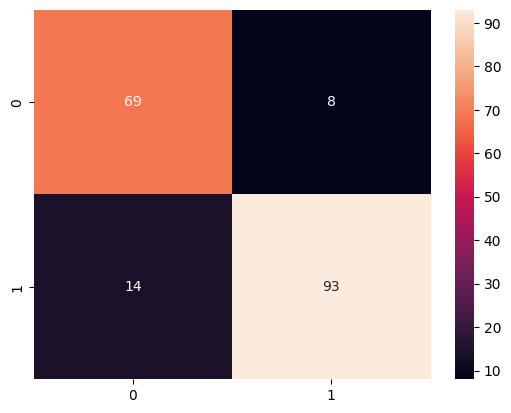

In [ ]:
cm = tf.math.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)

**ACCURACY**

In [ ]:
accuracy_score(y_test, y_pred)

0.8478260869565217

<Axes: >

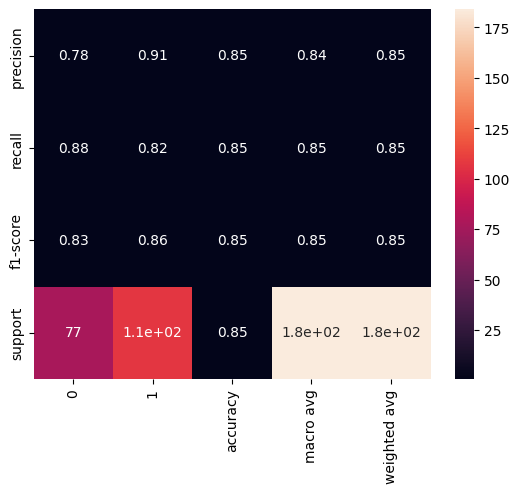

In [ ]:
clf = classification_report(y_test, y_pred, output_dict = True)
sns.heatmap(pd.DataFrame(clf), annot= True)

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X = data.drop(['HeartDisease'], axis=1)  # Features
y = data['HeartDisease']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.842391304347826


**LINEAR REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = data
X = df.drop(['HeartDisease'], axis=1)  # Features
y = df['HeartDisease']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1372907785161545


**KNN,DECISION TREES,NAIVE BAYES**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
df=data
X = df.drop(['HeartDisease'], axis=1)  # Features
y = df['HeartDisease']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# Decision Tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

Naive Bayes Accuracy: 0.842391304347826
Decision Tree Accuracy: 0.8152173913043478
KNN Accuracy: 0.7010869565217391


**FEATURE REGULARIZATION**

In [ ]:
df=data
X = df.drop(['HeartDisease'], axis=1)  # Features
y = df['HeartDisease']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the logistic regression model with Elastic Net regularization
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6413043478260869


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**ACCURACY USING K FOLD**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# Create a DataFrame
df = data
# Preprocess the data
X = df.drop(['HeartDisease'], axis=1)  # Features
y = df['HeartDisease']  # Target variable
# Create logistic regression model
logreg = LogisticRegression()

In [ ]:
# Perform k-fold cross-validation
scores = cross_val_score(logreg, X, y, cv=5)
# Print accuracy scores for each fold
print("Accuracy Scores for each fold:", scores)
# Calculate and print mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)


Accuracy Scores for each fold: [0.81521739 0.80978261 0.80978261 0.81967213 0.77595628]
Mean Accuracy: 0.8060822047992398


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

K MEAN CLUSTERING

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Select the numerical features for normalization
numerical_features = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']

# Extract the numerical features from the DataFrame
X = df[numerical_features]

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(X_scaled, columns=numerical_features)

# Replace the original numerical features with the scaled features in the original DataFrame
df[numerical_features] = df_scaled

# Print the normalized dataset
print(df)

          Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0    0.244898  1.0       0.333333       0.70     0.479270        0.0   
1    0.428571  0.0       0.666667       0.80     0.298507        0.0   
2    0.183673  1.0       0.333333       0.65     0.469320        0.0   
3    0.408163  0.0       0.000000       0.69     0.354892        0.0   
4    0.530612  1.0       0.666667       0.75     0.323383        0.0   
..        ...  ...            ...        ...          ...        ...   
913  0.346939  1.0       1.000000       0.55     0.437811        0.0   
914  0.816327  1.0       0.000000       0.72     0.320066        1.0   
915  0.591837  1.0       0.000000       0.65     0.217247        0.0   
916  0.591837  0.0       0.333333       0.65     0.391376        0.0   
917  0.204082  1.0       0.666667       0.69     0.290216        0.0   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0           0.5  0.788732             0.0  0.295455      

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df=data
# Select features for clustering
features =['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']
# Extract the selected features from the DataFrame
X = df[features]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Perform k-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_
# Print the cluster labels for each data point
print("Cluster Labels:")
print(cluster_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Labels:
[1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0
 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1
 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1
 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 

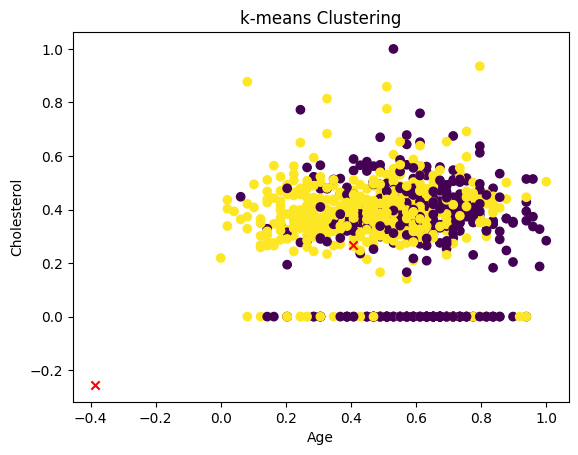

In [ ]:
plt.scatter(X['Age'], X['Cholesterol'], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title('k-means Clustering')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

**DB SCAN**

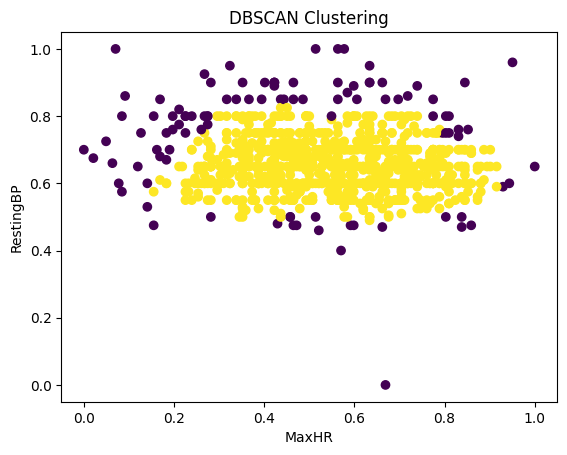

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df=data
# Select features for clustering
features = ['MaxHR','RestingBP']
# Extract the selected features from the DataFrame
X = df[features]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.4, min_samples=20)
cluster_labels = dbscan.fit_predict(X_scaled)
# Plot the clusters
plt.scatter(X['MaxHR'], X['RestingBP'], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('MaxHR')
plt.ylabel('RestingBP')
plt.show()


**ANAMOLY DETECTION**

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

df = data
# Select features for anomaly detection
features = ['FastingBS', 'Cholesterol', 'RestingBP', 'MaxHR']
# Extract the selected features from the DataFrame
X = df[features]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Perform anomaly detection using Isolation Forest
clf = IsolationForest(contamination=0.05)  # 5% of the data is assumed to be anomalous
clf.fit(X_scaled)
anomaly_scores = clf.decision_function(X_scaled)
# Set the threshold for classifying anomalies
threshold = anomaly_scores.mean()
# Classify anomalies based on the threshold
predictions = (anomaly_scores < threshold).astype(int)
# Calculate the anomaly accuracy
anomaly_accuracy = sum(predictions == 1) / len(predictions)
# Print the anomaly accuracy
print("Anomaly Accuracy: {:.2%}".format(anomaly_accuracy))


Anomaly Accuracy: 44.77%
